In [2]:
import pandas as pd
import logging, time, datetime
from autots import AutoTS
import matplotlib.pyplot as plt
from dslibs.simple_yahoo import get_from_yahoo

logging.getLogger('autots').setLevel(logging.ERROR)

df = get_from_yahoo('BTC-USD', '2014-09-20', '2023-03-01')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
1,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
3,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
4,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
...,...,...,...,...,...,...,...
3080,2023-02-24,23946.007813,24103.705078,23007.072266,23198.126953,23198.126953,26811744928
3081,2023-02-25,23200.125000,23210.210938,22861.558594,23175.375000,23175.375000,16100721565
3082,2023-02-26,23174.150391,23654.367188,23084.220703,23561.212891,23561.212891,16644534842
3083,2023-02-27,23561.451172,23857.890625,23205.878906,23522.871094,23522.871094,22660763494


In [ ]:
start = time.time()
model = AutoTS(forecast_length=7, frequency='D', prediction_interval=1, ensemble='simple')
model.fit(df, date_col='Date', value_col='Close')
print('Time[min]: ' + str((time.time() - start)/60))

In [9]:
                # Wyświetlenie prognozy
# prediction = model.predict()#date_col='Date', value_col='Close')#test_data, )
prediction = model.predict(forecast_length=30)#date_col='Date', value_col='Close')#test_data, )
forecast = prediction.forecast
print("============= PROGNOZA ===================")
print(forecast)
print("==========================================")

# forecast.index
# df

============= PROGNOZA ===================
                   Close
2023-02-28  23804.567924
2023-03-01  23713.633891
2023-03-02  23622.700078
2023-03-03  23531.766379
2023-03-04  23440.832793
2023-03-05  23362.395659
2023-03-06  23284.017880
2023-03-07  23205.640529
2023-03-08  23127.263267
2023-03-09  23048.886093
2023-03-10  22982.988201
2023-03-11  22917.166542
2023-03-12  22851.345939
2023-03-13  22785.595428
2023-03-14  22729.837882
2023-03-15  22674.120229
2023-03-16  22618.403202
2023-03-17  22562.686919
2023-03-18  22507.055715
2023-03-19  22461.381313
2023-03-20  22415.767582
2023-03-21  22370.154585
2023-03-22  22324.541679
2023-03-23  22278.928791
2023-03-24  22233.302056
2023-03-25  22187.688823
2023-03-26  22142.076155
2023-03-27  22096.468068
2023-03-28  22063.265741
2023-03-29  22030.199243


In [2]:

from libs.simple_yahoo import get_from_yahoo

real = get_from_yahoo('BTC-USD', '2023-03-01', '2023-03-08')
real

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-28,23521.837891,23585.384766,23077.650391,23147.353516,23147.353516,20535363434
1,2023-03-01,23171.025391,23875.796875,23093.820313,23431.033203,23431.033203,25000525824


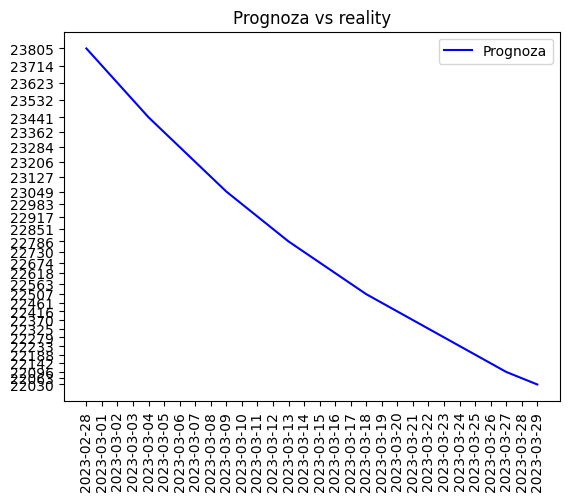

<Figure size 640x480 with 0 Axes>

ValueError: Found input variables with inconsistent numbers of samples: [1, 30]

In [14]:
plt.title('Prognoza vs reality')
# plt.plot(real['Date'][:-1], real['Close'][:-1], 'red', label='Reality')
plt.plot(forecast.index, forecast.values[:, 0], 'blue', label='Prognoza')
plt.xticks(real['Date'][::1], rotation=90)
plt.xticks(forecast.index[::1], rotation=90)
plt.yticks(forecast.values[:, 0][::1])
plt.legend()
plt.figure()
plt.show()

import sklearn.metrics as skm
mae = skm.mean_absolute_error(real['Close'][:-1], forecast.values[:, 0])
int(mae)

In [52]:
import joblib
import time
import datetime

# Pobranie aktualnego czasu w sekundach
current_time = time.time()

# Konwersja na typ datetime.datetime
datetime_obj = datetime.datetime.fromtimestamp(current_time)

# Konwersja na string z formatem YYYY-MM-DD HH:MM:SS
datetime_str = datetime_obj.strftime('%Y-%m-%d-%H-%M-%S')

filename = "btc-usd-AutoTS-mae"+str(int(mae))+"-"+datetime_str+".joblib"

joblib.dump(model, filename)

print("Model saved.")

Model saved.


In [3]:

import joblib

model1 = joblib.load(filename)
prediction = model1.predict()
forecast = prediction.forecast
print(forecast)


NameError: name 'filename' is not defined